<a href="https://colab.research.google.com/github/Srivardini/Artificial_star/blob/main/Five_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
!pip install photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.7/866.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: astropy
    Found existing installation: astropy 4.3.1
    Uninstalling astropy-4.3.1:
      Successfully uninstalled astropy-4.3.1


In [ ]:
import os
import sys

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.nddata import CCDData
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
 
from photutils.datasets import make_gaussian_sources_image

In [ ]:
# To improve Aesthetics of plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

#Five_Stars

In [ ]:
from photutils.datasets import make_random_gaussians_table, make_gaussian_sources_image

#Table:
shape = (500,500)
n_sources = 5
param_ranges = {'flux': [100, 1000],
                    'x_mean': [50, 450],
                    'y_mean': [50, 450],
                    'x_stddev': [3,3],
                    'y_stddev': [3,3],
                    'theta': [0, np.pi]} 
sources = make_random_gaussians_table(n_sources, param_ranges, seed =12345)

#make_image:

stars_image = make_gaussian_sources_image(shape, sources)

In [ ]:
sources

flux,x_mean,y_mean,x_stddev,y_stddev,theta,amplitude
float64,float64,float64,float64,float64,float64,float64
304.6024202204527,183.12557114655382,149.2982858518284,3.0,3.0,2.562837155971277,5.386553428426637
385.08250573877757,289.32350143487594,429.5524607333273,3.0,3.0,0.6072522333720015,6.809753809615512
817.6289115994607,124.69367424148534,316.894981240149,3.0,3.0,0.4067390985853497,14.458853655100055
708.6292036758771,319.10241760584853,88.35917423764484,3.0,3.0,0.28797331004670434,12.531315620476592
451.9985955417181,426.72114610797485,226.7358664671251,3.0,3.0,1.8804568744035262,7.993090083450974


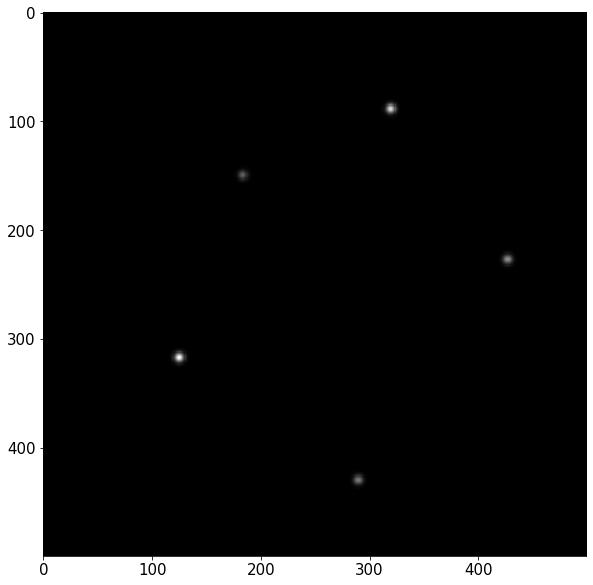

In [ ]:
plt.imshow(stars_image, interpolation = 'nearest', cmap = 'gray')

In [ ]:
#Table-'20 Stars, stddev = [1], pos = [0,200]':

shape = (500,500)
n_sources_1 = 20
param_ranges_1 = {'flux': [100, 1000],
                    'x_mean': [0, 200],
                    'y_mean': [0, 200],
                    'x_stddev': [1,1],
                    'y_stddev': [1,1],
                    'theta': [0, np.pi]} 
sources_1 = make_random_gaussians_table(n_sources_1, param_ranges_1, seed =123456)

#make_image:

stars_image_1 = make_gaussian_sources_image(shape, sources_1)

In [ ]:
#Table-'15 Stars, stddev = [2], pos = [150,300]':

shape = (500,500)
n_sources_2 = 15
param_ranges_2 = {'flux': [100, 1000],
                    'x_mean': [150, 300],
                    'y_mean': [150, 300],
                    'x_stddev': [2,2],
                    'y_stddev': [2,2],
                    'theta': [0, np.pi]} 
sources_2 = make_random_gaussians_table(n_sources_2, param_ranges_2, seed =123457)

#make_image:

stars_image_2 = make_gaussian_sources_image(shape, sources_2)

In [ ]:
#Table-'50 Stars, stddev = [4], pos = [0,500]':

shape = (500,500)
n_sources_3 = 50
param_ranges_3 = {'flux': [100, 1000],
                    'x_mean': [0, 500],
                    'y_mean': [0, 500],
                    'x_stddev': [4,4],
                    'y_stddev': [4,4],
                    'theta': [0, np.pi]} 
sources_3 = make_random_gaussians_table(n_sources_3, param_ranges_3, seed =123458)

#make_image:

stars_image_3 = make_gaussian_sources_image(shape, sources_3)

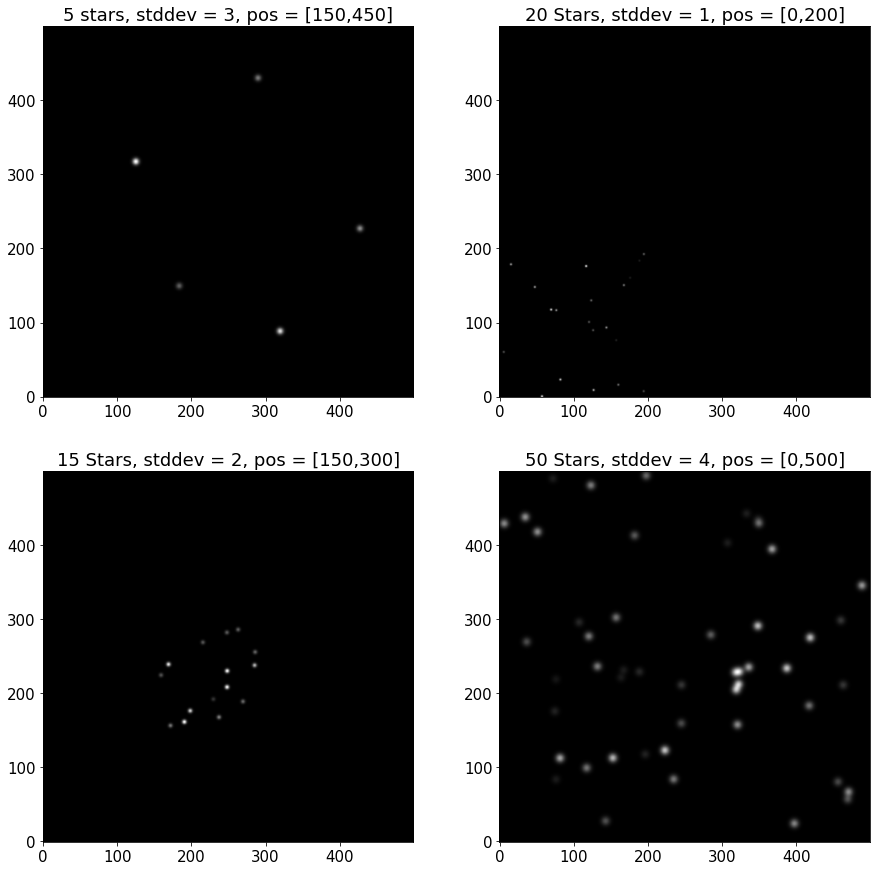

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.subplots(2,2)

ax[0,0].set_title('5 stars, stddev = 3, pos = [150,450]')
ax[0,0].imshow(stars_image, cmap='gray', origin='lower')
ax[0,1].set_title('20 Stars, stddev = 1, pos = [0,200]')
ax[0,1].imshow(stars_image_1, cmap='gray', origin='lower')
ax[1,0].set_title('15 Stars, stddev = 2, pos = [150,300]')
ax[1,0].imshow(stars_image_2, cmap='gray', origin='lower')
ax[1,1].set_title('50 Stars, stddev = 4, pos = [0,500]')
ax[1,1].imshow(stars_image_3, cmap='gray', origin='lower')

#Stars_Detection

In [ ]:
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats

In [ ]:
mean, median, std = sigma_clipped_stats(stars_image, sigma=3.0)  

daofind = DAOStarFinder(fwhm=9.42, threshold=5.*std)  
sources_stars = daofind(stars_image - median)  

In [ ]:
sources_stars

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,319.1005319265878,88.35552525812568,0.4589147275081971,0.010716845854935346,0.009097430460255398,169,0.0,12.434576394533671,13832636.619499626,-17.852262420656974
2,183.1233049597628,149.29441941132228,0.4591782217393015,0.00985383806461007,0.005613071030960291,169,0.0,5.355299926514062,5960051.7862500055,-16.938125083236876
3,426.7249788384287,226.7396439565466,0.45885396542757634,0.015914659802203007,-0.0006137062650336373,169,0.0,7.927847324457312,8818293.091813862,-17.36346132321887
4,124.69754089860425,316.89691089806433,0.4591772858554946,0.00516667241784081,-0.006349186536524394,169,0.0,14.374864147851907,15998133.93477067,-18.010173320843712
5,289.3196626593726,429.55475605595046,0.45765994327475157,-0.02928596043226883,0.0073807481279563655,169,0.0,6.695359021377085,7432279.002169959,-17.177805010950415


#Aperture_Photometry

In [ ]:
from photutils.aperture import CircularAperture

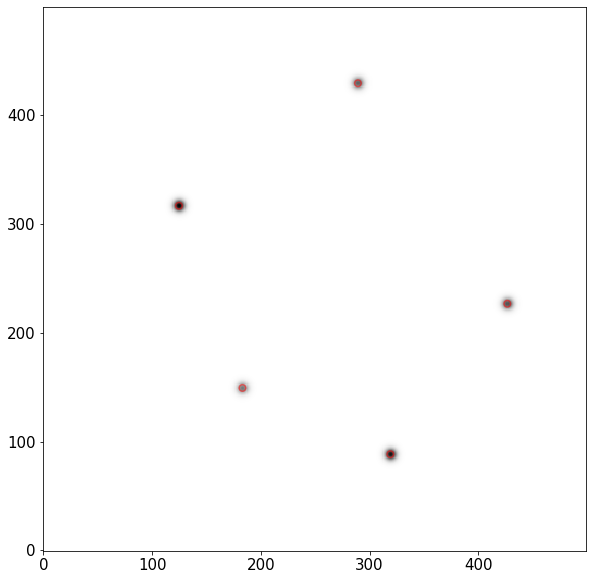

In [ ]:
positions = np.transpose((sources_stars['xcentroid'], sources_stars['ycentroid']))
apertures = CircularAperture(positions, r=3.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(stars_image, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='red', lw=1.5, alpha=0.5)

In [ ]:
from photutils.aperture import aperture_photometry

photo_table = aperture_photometry(stars_image, apertures)
photo_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,319.1005319265878,88.35552525812568,276.7676360194589
2,183.1233049597628,149.29441941132228,118.91925503387498
3,426.7249788384287,226.7396439565466,176.5637360135529
4,124.69754089860425,316.89691089806433,319.208388609508
5,289.3196626593726,429.55475605595046,150.68298850764864
